## Overview

The new covid-era has provided a new way of living the work-life balance. We have seen a lot of different websites providing packages to work from different locations. From Kashmir to Kanyakumari, from Gujarat to Assam we have collected packages in and around India. It becomes really difficult to find the best place with all the amenities such as high-speed internet, a comfortable stay as well as within the budget. To solve the real-world problem of finding the best deals for a calm and enjoying workation trip. Workation is the best way to work at a remote location with a recreational and rejuvenating vacation for the team.

In this competition, one has to use the knowledge of machine learning, deep learning, and model building to predict the price per person for your next workstation trip. The data has more than 18000+ rows of different packages with the details like start location, hotel type, cost per person, destination, Itinerary, and many more.

 

### Dataset Description:

Train.csv - 21000 rows x 15 columns (Includes Per Person Price Column as Target variable)<br>
Test.csv - 9000 rows x 14 columns (Doesn't include the Target Variable)<br>
Sample Submission.csv - Please check the Evaluation section for more details on how to generate a valid submission<br>
 

### Attributes:

|Features|Description|
|:----|:----|
|Uniq Id| Unique Identifier per row sample|
|Package Name| Name of the tour package|
|Package Type| Type of the tour package|
|Destination| A destination place|
|Itinerary| complete itinerary|
|Places Covered| covered places in the itinerary|
|Travel Date| Date of travel|
|Hotel Details| Details of the hotel stay|
|Start City| Start place for the travel|
|Airline| Flight details|
|Flight Stops| Intermediate stops if any|
|Meals| Inflight meals or services|
|Sightseeing Places Covered| Itinerary details regarding sightseeing|
|Cancellation Rules| Cancellation policy as per travel company|
|Per Person Price| Price of the tour package per person (Target Column)|

### Skills:

Advanced Regression Modeling<br>
Feature Engineering, Ensemble Modeling<br>
Optimizing RMSLE(Root Mean Squared Log Error) as a metric to generalize well on unseen data

### Preliminary Data Analysis

In [1]:
import pandas as pd
import numpy as np
import math
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read train data for model development in research environment and test data for evaluation in production environment

df = pd.read_csv('C:/Users/priya/Downloads/Participant_Data_WPPH/Participant_Data_WPPH/Train.csv')
df_test = pd.read_csv('C:/Users/priya/Downloads/Participant_Data_WPPH/Participant_Data_WPPH/Test.csv')

In [3]:
print(f'Train data shape: {df.shape} \nTest data shape: {df_test.shape}')

Train data shape: (21000, 15) 
Test data shape: (9000, 14)


In [4]:
df.head()

,Uniq Id,Package Name,Package Type,Destination,Itinerary,Places Covered,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,e788ab76d9d8cf1e6ed2f139645ca5d1,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,New Delhi|Shimla|Manali|Chandigarh,30-07-2021,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,178f892630ce3e335a5a41d5d83937fd,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,Srinagar|Pahalgam|Srinagar,08-12-2021,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,f060f2954840503cc2fdaf495357b7df,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,Udaipur|Chittorgarh,26-04-2021,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5
3,32a19a6c171e67448f2346da46c619dc,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,Munnar|Kumarakom|Allepey|Kovalam and Poovar,27-08-2021,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,Mattupetty Dam | Echo Point | Tata Tea Museum...,Cancellation any time after making the 1st pay...,35967.0
4,107b068aa0ca03bc6248966f594d105f,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,Pattaya|Bangkok,12-12-2021,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,"Coral Island Tour with Indian Lunch, Join Spe...",Cancellation any time after making the 1st pay...,25584.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 15 columns):
Uniq Id                       21000 non-null object
Package Name                  21000 non-null object
Package Type                  21000 non-null object
Destination                   21000 non-null object
Itinerary                     21000 non-null object
Places Covered                21000 non-null object
Travel Date                   21000 non-null object
Hotel Details                 21000 non-null object
Start City                    21000 non-null object
Airline                       21000 non-null object
Flight Stops                  21000 non-null int64
Meals                         21000 non-null int64
Sightseeing Places Covered    21000 non-null object
Cancellation Rules            21000 non-null object
Per Person Price              21000 non-null float64
dtypes: float64(1), int64(2), object(12)
memory usage: 2.4+ MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 14 columns):
Uniq Id                       9000 non-null object
Package Name                  9000 non-null object
Package Type                  9000 non-null object
Destination                   9000 non-null object
Itinerary                     9000 non-null object
Places Covered                9000 non-null object
Travel Date                   9000 non-null object
Hotel Details                 9000 non-null object
Start City                    9000 non-null object
Airline                       9000 non-null object
Flight Stops                  9000 non-null int64
Meals                         9000 non-null int64
Sightseeing Places Covered    9000 non-null object
Cancellation Rules            9000 non-null object
dtypes: int64(2), object(12)
memory usage: 984.5+ KB


In [7]:
print('Train data cardinality')
for col in df.columns:
    print(f'{col:35}: {df[col].nunique()}')
    
print('\n\n')

print('Test data cardinality')
for col in df_test.columns:
    print(f'{col:35}: {df_test[col].nunique()}')

Train data cardinality
Uniq Id                            : 21000
Package Name                       : 2204
Package Type                       : 5
Destination                        : 565
Itinerary                          : 966
Places Covered                     : 565
Travel Date                        : 495
Hotel Details                      : 6060
Start City                         : 2
Airline                            : 314
Flight Stops                       : 3
Meals                              : 4
Sightseeing Places Covered         : 1714
Cancellation Rules                 : 10
Per Person Price                   : 17138



Test data cardinality
Uniq Id                            : 9000
Package Name                       : 2065
Package Type                       : 5
Destination                        : 551
Itinerary                          : 941
Places Covered                     : 552
Travel Date                        : 460
Hotel Details                      : 3693
Start City

In [8]:
print('Missing values in dataset:')
for col in df.columns:
    count = df[ df[col] == 'Not Available' ][col].count()
    #df[col].replace(to_replace='Not Available', value= np.NaN,inplace=True)
    if count>0:
        print(f'{col:30}: {round(count/len(df)*100,2):>5}% ({count})')

Missing values in dataset:
Hotel Details                 : 13.95% (2929)
Airline                       : 23.38% (4910)
Sightseeing Places Covered    :  7.73% (1623)
Cancellation Rules            :  3.79% (795)


C:\Users\priya\anaconda3\lib\site-packages\pandas\core\ops\__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [9]:
print(f"Are 'Destination' and 'Places Covered' columns same? {df['Destination'].equals(df['Places Covered'])}")

if df['Destination'].equals(df['Places Covered']):
    df.drop(columns=['Uniq Id', 'Places Covered'],inplace=True)
    print('Redundant and Duplicate columns removed')
else:
    df.drop(columns=['Uniq Id'],inplace=True)
    print('Redundant column removed')

print(f'Duplicate rows: {df.duplicated().sum()}')
#df.drop_duplicates(inplace=True)
#print('Duplicate rows removed')
#df.dropna(axis=0, thresh=11, inplace=True)

Are 'Destination' and 'Places Covered' columns same? True
Redundant and Duplicate columns removed
Duplicate rows: 3


In [10]:
# Covert travel date column datatype to datetime
df['Travel Date'] = pd.to_datetime(df['Travel Date'])

In [11]:
df.head(3)

,Package Name,Package Type,Destination,Itinerary,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,Sightseeing Places Covered,Cancellation Rules,Per Person Price
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,2021-07-30,Not Available,Mumbai,Not Available,2,3,Not Available,Not Available,11509.0
1,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,2021-08-12,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,Dal Lake | Avantipura Ruins | Mughal Gardens ...,Cancellation any time after making the 1st pay...,22485.5
2,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,2021-04-26,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,Lake Pichola | Jag Mandir Palace | Saheliyon ...,Cancellation any time after making the 1st pay...,12421.5


### Constructing new features

In [12]:
south =['Tirupati','Trincomalee', 'Trivandrum','Wayanad','Thekkady',  'Tiruchirapally','Kabini', 'Bandipur', 'Bangalore',
       'Hampi','Chennai','Pondicherry','Ooty','Mysore','Kanyakumari', 'Kodaikanal','Cochin', 'Coorg','Madurai','Mahe Island',
        'Munnar', 'Mussoorie','Rameshwaram','Tanjore','Havelock','Port Blair', 'Niel Island','Allepey','Kanchipuram',
       'Kovalam', 'Kovalam and Poovar','Chikmangalur','Gokarna','Hassan','Varkala','Poovar','Kumarakom', 'Kumbakonam']
    
north =['Agra','Ajmer','Srinagar','Jammu','Chandigarh', 'New Delhi','Pushkar','Rishikesh','Udaipur','Chittorgarh', 'Varanasi','Shillong', 'Shimla', 'Jaipur', 'Jaisalmer', 'Jodhpur',
       'Alwar', 'Amritsar', 'Lucknow', 'Manali', 'Mathura','Ranikhet', 'Ranthambhore','Gwalior',  'Haridwar','Khajuraho',
       'Leh', 'Nainital','Saputara','Bikaner', 'Corbett', 'Almora','Bharatpur','Chail','Kangra',  'Kasauli','Joshimath',
       'Chintpurni', 'Dalhousie','Gulmarg','Kasol', 'Katra', 'Kausani',  'Kishangarh','Pahalgam', 'Nubra Valley','Nawalgarh',
       'Sonmarg','Ranakpur', 'Orchha','Palampur', 'Parwanoo', 'Patnitop', 'Kumbalgarh','Kullu']

east=['Siliguri','Darjeeling', 'Dharamshala','Gangtok', 'Bundi', 'Kalimpong','Pelling','Lachung','Lachen',
     'Guwahati','Kaziranga', 'Namchi', 'Nameri','Cherrapunjee']
west=['Alibagh','Ahmednagar','Ahmedabad','Vadodara','Dwarka','Ganpatipule',  'Goa','Somnath','Shirdi','Lonavala And Khandala',
     'Mandawa', 'Mumbai','Nanded', 'Nasik', 'Jamnagar','Aurangabad','Daman', 'Pali']

abroad=['Abu Dhabi','Anuradhapura','Auckland','Bali','Bangkok','Colombo','Genting','Kuala Lumpur','Dubai','Thimpu','Sharjah',
       'Singapore', 'Singapore Cruise','Sydney','Phuket','Pattaya','Hong Kong','Jakarta','Mauritius', 'Melbourne',
       'Moscow', 'Mount Abu','Prague','Paro','Paris','Oslo','Saint Petersburg','Queenstown', 'Copenhagen','Cairns','Ras Al Khaimah',
       'Batam','Bentota','Bintan Island','Praslin Island','Gold Coast','Kandy','Johor Bahru','Helsinki','Christchurch',
       'Dambulla','Franz Josef', 'Galle','Kota Kinabalu','Krabi town', 'Penang','Langkawi', 'Rotorua','Seminyak','Sigiriya', 'Yala','Punakha',
        'Phuentsholing','Negombo','Nuwara Eliya','Kuta']

In [13]:
def get_trip_period(x):
    total = 0
    for i in x.split():
        for a in i:
            if a.isdigit():
                total+=int(a)
    return total

df['Total Trip Duration'] = df.Itinerary.apply(get_trip_period)

def get_num_places(x):
    return len(x.split('|'))

df['Total Places Covered'] = df['Destination'].apply(get_num_places)
df['Total Sightseeing Places Covered'] = df['Sightseeing Places Covered'].apply(get_num_places)
df['Total Hotels'] = df['Hotel Details'].apply(get_num_places)


def airline(x):
    return ', '.join(set(x.split('|')))

df['Airline_new'] = df['Airline'].apply(airline)


df['Travel Month'] = df['Travel Date'].dt.month
#df['Travel Year'] = df['Travel Date'].dt.year
# Monday 0 ....Sunday 6
#df['Travel Weekday'] = df['Travel Date'].dt.weekday
#df['Is Weekend'] = df['Travel Weekday'].apply(lambda x: 0 if x in [0,1,2,3,4] else 1)


# Creating new region column

#ind = df.columns.get_loc('Destination')
lists = []
destination = df['Destination'].apply(lambda x: x.split('|'))
for i in range(0,len(df['Destination'])):   
    if destination[i][0] in south:
        lists.append('south')
    elif destination[i][0] in abroad:
        lists.append('abroad')
    elif destination[i][0] in north:
        lists.append('north')
    elif destination[i][0] in west:
        lists.append('west')
    else: 
        lists.append('east')
        
df['Region'] = pd.Series(lists)


# Calculating average hotel ratings

def hotels_avg_rating(x):

    l = []
    for t in x.split('|'):
        for e in t.split(':'):
            try:
                l.append(float(e))
            except ValueError:
                pass

    if len(x.split('|')) != len(l):
        for n in range(0,len(x.split('|')) - len(l)):
            l.append(np.mean(l))
            
    return np.mean(l)

df['Hotels Avg Rating'] = df['Hotel Details'].apply(hotels_avg_rating)
df.head()

C:\Users\priya\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3334: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


,Package Name,Package Type,Destination,Itinerary,Travel Date,Hotel Details,Start City,Airline,Flight Stops,Meals,...,Cancellation Rules,Per Person Price,Total Trip Duration,Total Places Covered,Total Sightseeing Places Covered,Total Hotels,Airline_new,Travel Month,Region,Hotels Avg Rating
0,Best of Shimla and Manali Holiday from Delhi,Standard,New Delhi|Shimla|Manali|Chandigarh,1N New Delhi . 2N Shimla . 2N Manali . 1N Chan...,2021-07-30,Not Available,Mumbai,Not Available,2,3,...,Not Available,11509.0,6,4,1,1,Not Available,7,north,NaN
1,Kashmir Valley vacation,Premium,Srinagar|Pahalgam|Srinagar,1N Srinagar . 2N Pahalgam . 1N Srinagar,2021-08-12,The Orchard Retreat & Spa:4.6|WelcomHotel Pine...,New Delhi,IndiGo|IndiGo,0,5,...,Cancellation any time after making the 1st pay...,22485.5,4,3,7,3,IndiGo,8,north,4.433333
2,Might of Mewar- Udaipur and Chittorgarh,Luxury,Udaipur|Chittorgarh,2N Udaipur . 1N Chittorgarh,2021-04-26,The Ananta:4.4|juSTa Lake Nahargarh Palace:4,New Delhi,IndiGo,0,4,...,Cancellation any time after making the 1st pay...,12421.5,3,2,8,2,IndiGo,4,north,4.200000
3,Colorful Kerala ( Romantic Getaway ),Premium,Munnar|Kumarakom|Allepey|Kovalam and Poovar,2N Munnar . 1N Kumarakom . 1N Allepey . 2N Kov...,2021-08-27,Elixir Hills Suites Resort & Spa-MMT Holidays ...,New Delhi,IndiGo,0,5,...,Cancellation any time after making the 1st pay...,35967.0,6,4,9,4,IndiGo,8,south,4.500000
4,A Week In Bangkok & Pattaya,Premium,Pattaya|Bangkok,4N Pattaya . 3N Bangkok,2021-12-12,Dusit Thani Pattaya - MMT Special:4.5|Amari Wa...,New Delhi,Spicejet|Go Air,0,5,...,Cancellation any time after making the 1st pay...,25584.0,7,2,2,2,"Spicejet, Go Air",12,abroad,4.350000


### Train and test split

In [14]:
from sklearn.model_selection import train_test_split
train, test, y_train, y_test = train_test_split(df.drop(columns=['Per Person Price']), df['Per Person Price'], 
                                                test_size=0.2, random_state=42)

### Filling missing value

ParserError: Unknown string format: Not Available

In [16]:
def mode_impute(data,dep_var,mis_var):

    temp = pd.DataFrame(df.groupby(dep_var)[mis_var].agg(pd.Series.mode))
    mis_var_ind = data.columns.get_loc(mis_var)
    dep_var_ind = data.columns.get_loc(dep_var)
    data[mis_var].replace(to_replace='Not Available', value= np.NaN,inplace=True)
    
    for i in range(len(data)):
        if pd.isnull(data.iloc[i,mis_var_ind]):
            package = data.iloc[i,dep_var_ind]
            if package in temp.index.to_list():
                try:
                    if (temp.loc[package,mis_var]!=np.nan) & (temp.loc[package,mis_var]!='Not Available'):
                        data.iloc[i,mis_var_ind] = temp.loc[package,mis_var]
                    else:
                        data.iloc[i,mis_var_ind] = temp[mis_var].mode()[0]
                except:
                    if (temp.loc[package,mis_var][0]!=np.nan) & (temp.loc[package,mis_var][0]!='Not Available'):
                        data.iloc[i,mis_var_ind] = temp.loc[package,mis_var][0]
                    else:
                        data.iloc[i,mis_var_ind] = temp[mis_var].mode()[0]
                      
            else:
                temp_df = pd.DataFrame(data.groupby(dep_var)[mis_var].agg(pd.Series.mode))
                try:
                    if (temp_df.loc[package,mis_var]!=np.nan) & (temp_df.loc[package,mis_var]!='Not Available'):
                        data.iloc[i,mis_var_ind] = temp_df.loc[package,mis_var]
                    else:
                        data.iloc[i,mis_var_ind] = temp_df[mis_var].mode()[0]
                except:
                    if (temp_df.loc[package,mis_var][0]!=np.nan) & (temp_df.loc[package,mis_var][0]!='Not Available'):
                        data.iloc[i,mis_var_ind] = temp_df.loc[package,mis_var][0]
                    else:
                        data.iloc[i,mis_var_ind] = temp_df[mis_var].mode()[0]
# Filling missing values in Average of Hotel Rating corresponding to Package type

mode_impute(train,'Package Name','Cancellation Rules')
mode_impute(test,'Package Name','Cancellation Rules')
mode_impute(train,'Package Type','Hotels Avg Rating')
mode_impute(test,'Package Type','Hotels Avg Rating')                   

### Categorical Encoding 

In [17]:
# Ordinal encoding of Package Type variables according to Price Per Person mean values for each category

def ordinal_encoding(train1,test,var,target):
    ordered_labels = train1.groupby(var)[target].mean().sort_values().index
    ordinal_labels = {k:i for i,k in enumerate(ordered_labels,0)}
    train[var] = train[var].map(ordinal_labels)
    test[var] = test[var].map(ordinal_labels)

ordinal_encoding(pd.concat([train,y_train],axis=1),test,'Package Type','Per Person Price')

# Categorical label/integer encoding of Start City variable 
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train['Start City'] = enc.fit_transform(train[['Start City']])
test['Start City'] = enc.transform(test[['Start City']])

# Frequency encoding of Package Name feature
count_map = df['Package Name'].value_counts().to_dict()
train['Package Name'] = train['Package Name'].map(count_map)

for i in range(len(test['Package Name'].unique())):
    if test['Package Name'].unique()[i] not in count_map.keys():
         count_map.update({test['Package Name'].unique()[i]:test['Package Name'].value_counts()[test['Package Name'].unique()[i]]})
test['Package Name'] = test['Package Name'].map(count_map)
     
     
# One hot encoding of Region variable
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
t = enc.fit_transform(train[['Region']])
t = pd.DataFrame(t.toarray(),columns=enc.get_feature_names(),index=train.index)
train = pd.concat([train,t],axis=1)

t_test =  pd.DataFrame(enc.transform(test[['Region']]).toarray(),columns=enc.get_feature_names(),index=test.index)
test = pd.concat([test,t_test],axis=1)
     
# Arbitrary label encoding of cancellation rules 

labels = [np.nan,1,2,3,4,5,5,6,7,4]
dictionary = dict(zip(df['Cancellation Rules'].unique(),labels))

# 1- not available
# 2- installments paid non refundable (3 installments)
# 3- refund available if cancellation wihin 24 hours, flights partial refund (3 installments)
# 4- Prices are dynamic, calculated on twin sharing basis, charges for some services not covered
# 5- Bookings confirm, customisable itenary, emergency cancellation strive for max flight refund, hotel refund as per agreement, 
# 6- fixed itenary,
# 7- same as 6 plus 8
# 8- gala dinner charges not included
# 9- Local representative + 4
# 10- same as 5

train['Cancellation Rules'] = train['Cancellation Rules'].map(dictionary)
test['Cancellation Rules'] = test['Cancellation Rules'].map(dictionary)


# for Airline_new multiply count ratio with price and encode

count_ratio = train['Airline_new'].value_counts()/train['Airline_new'].value_counts().sum()
count_ratio = pd.DataFrame(count_ratio)

count_ratio = count_ratio.join(pd.concat([train,y_train],axis=1).groupby('Airline_new')['Per Person Price'].median())
count_ratio['Airline'] = count_ratio['Airline_new'] * count_ratio['Per Person Price']
count_ratio

train['Airline_new'] = train['Airline_new'].apply(lambda x: count_ratio.loc[x,'Airline'])

def impute_test(x):
    try:
        return count_ratio.loc[x,'Airline']
    except:
        return count_ratio['Airline'].mean()

test['Airline_new'] = test['Airline_new'].apply(impute_test)

### Removing redundant features

In [18]:

def remove_feat(df):
    df.drop(columns=['Package Name','Destination', 'Itinerary','Travel Date', 'Hotel Details', 'Region',
                    'Airline','Sightseeing Places Covered'],inplace=True)

    #df.duplicated().sum()
    #df.drop_duplicates(inplace=True)
#df.dropna(axis=0, thresh=11, inplace=True)

remove_feat(train)
remove_feat(test)

### Data Analysis (relationship with target variable and feature distribution)

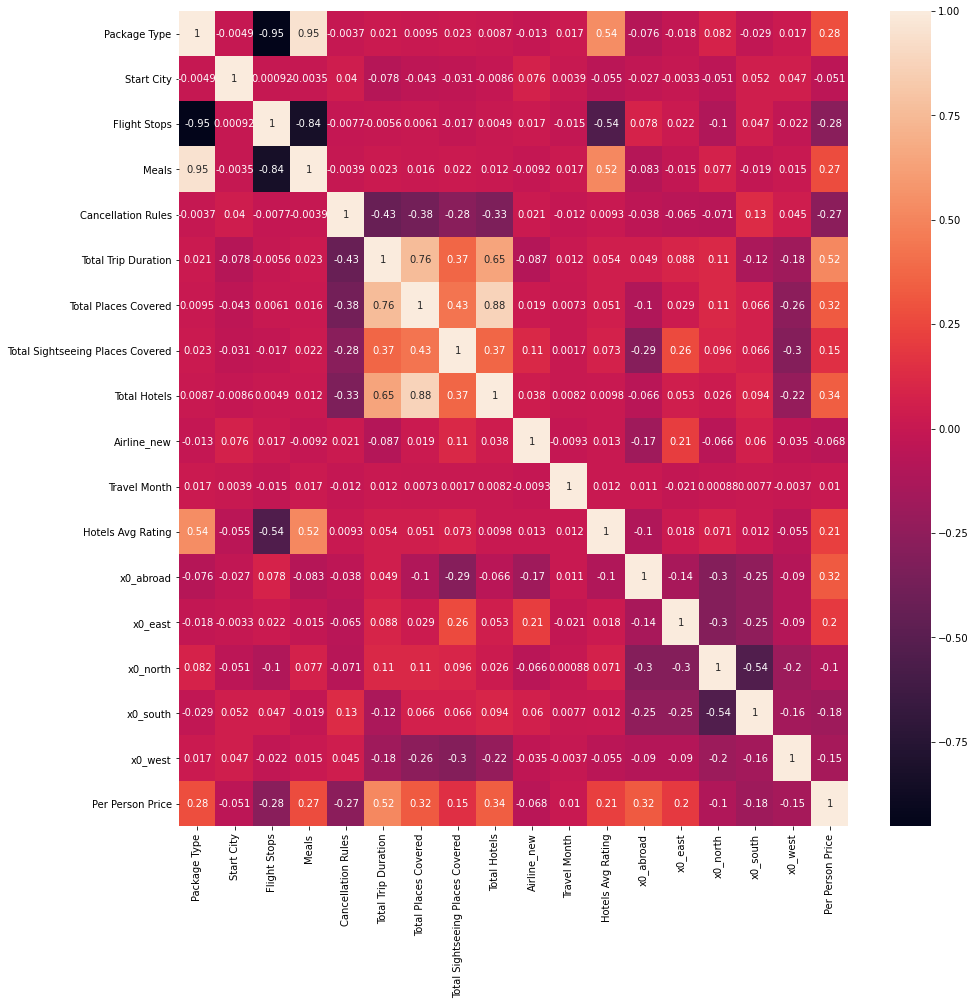

In [19]:
plt.figure(figsize=(15,15))
sns.heatmap(pd.concat([train,y_train],axis=1).corr(),annot=True);

In [20]:
train.select_dtypes(exclude=['O','datetime']).columns

Index(['Package Type', 'Start City', 'Flight Stops', 'Meals',
       'Cancellation Rules', 'Total Trip Duration', 'Total Places Covered',
       'Total Sightseeing Places Covered', 'Total Hotels', 'Airline_new',
       'Travel Month', 'Hotels Avg Rating', 'x0_abroad', 'x0_east', 'x0_north',
       'x0_south', 'x0_west'],
      dtype='object')

C:\Users\priya\anaconda3\lib\site-packages\pandas\core\frame.py:4110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


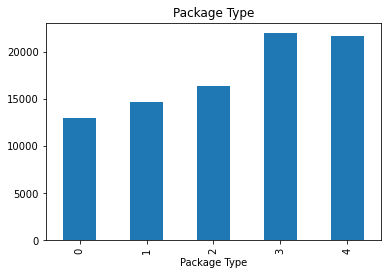

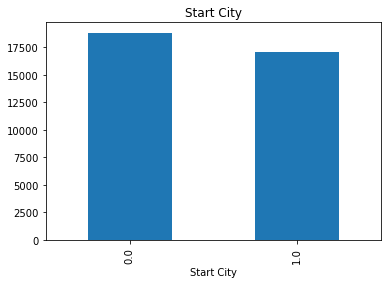

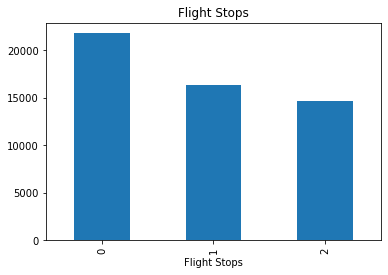

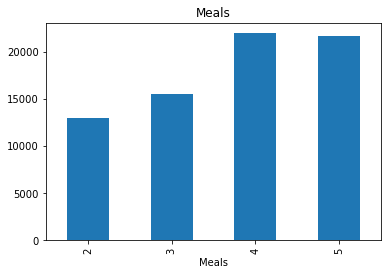

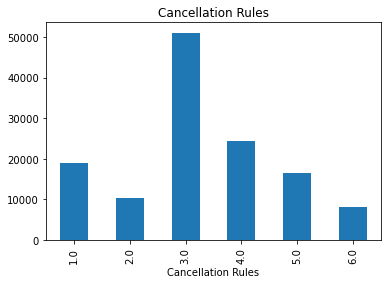

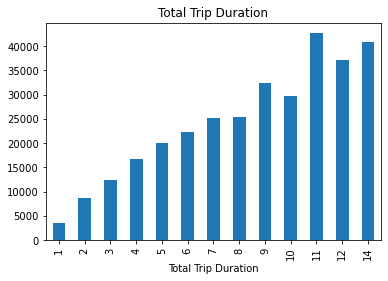

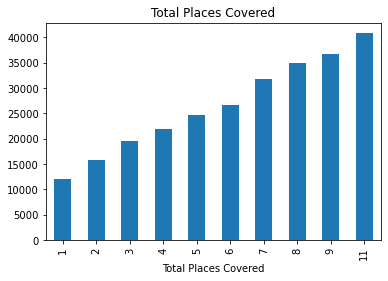

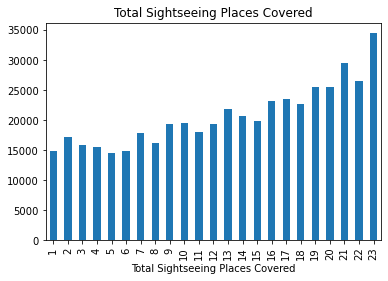

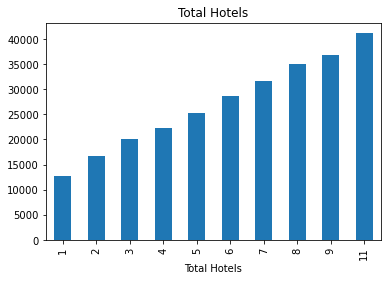

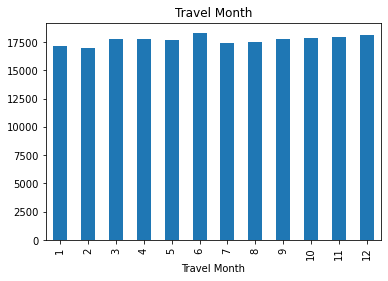

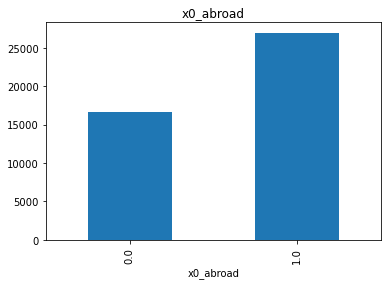

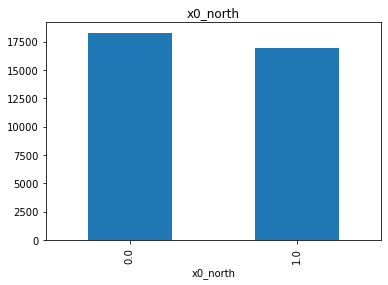

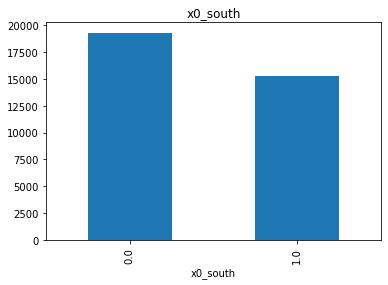

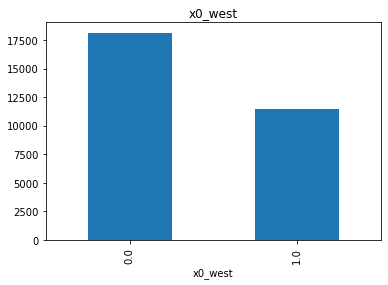

In [21]:
num_var = df.select_dtypes(exclude=['O','datetime'])
target = num_var['Per Person Price']
num_var.drop(axis=1, columns = 'Per Person Price',inplace=True)
num_var.insert(len(num_var.columns),'Per Person Price',target)
num_var

def analyse_dis_var(df, var):
    df.groupby(var)['Per Person Price'].median().plot.bar()
    plt.title(var)
    plt.show();
dis_var = ['Package Type', 'Start City', 'Flight Stops', 'Meals',
       'Cancellation Rules', 'Total Trip Duration', 'Total Places Covered',
       'Total Sightseeing Places Covered', 'Total Hotels',
       'Travel Month', 'x0_abroad', 'x0_north', 'x0_south', 'x0_west']
for var in dis_var:
        analyse_dis_var(pd.concat([train,y_train],axis=1),var) 

        
 

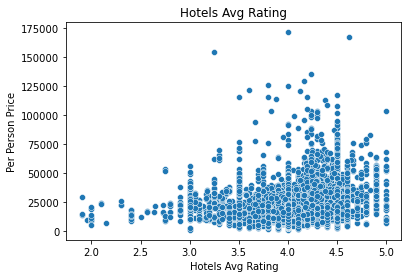

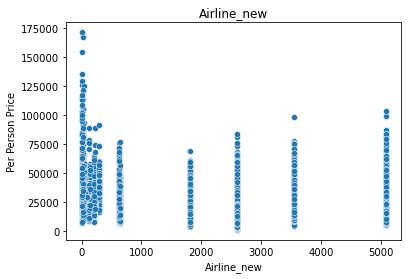

In [22]:
var = ['Hotels Avg Rating', 'Airline_new']
def analyse_con_var(df,var):
    sns.scatterplot(data=df,x=var,y='Per Person Price')
    plt.title(var)
    plt.show();
for v in var:
        analyse_con_var(pd.concat([train,y_train],axis=1),v)

### Outliers and rare labels

In [23]:
t = pd.concat([train,y_train],axis=1)
t = t[(t['Hotels Avg Rating']>3) & (t['Per Person Price']>100000)].index.to_list()

train.drop(index=t,inplace=True)
y_train.drop(index=t,inplace=True)

### Feature transformation

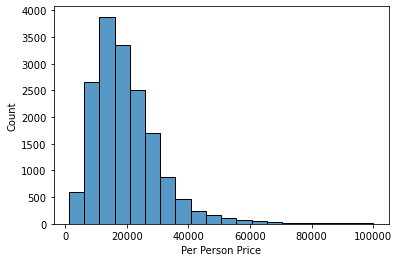

In [24]:
def hist_plot(df):
    sns.histplot(data=df,bins=20);

hist_plot(y_train)

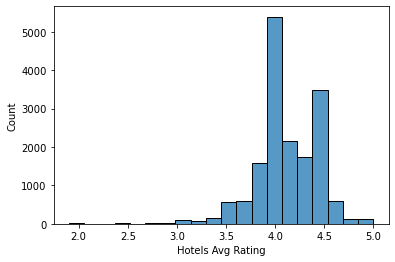

In [25]:
hist_plot(train['Hotels Avg Rating'])

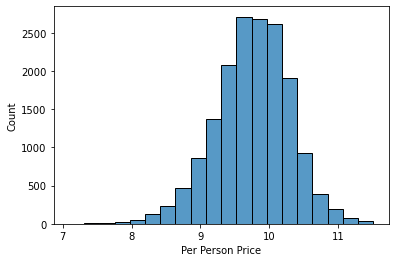

In [26]:
hist_plot(np.log(y_train))

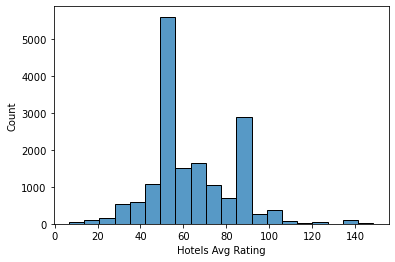

In [27]:
hist_plot(np.exp(train['Hotels Avg Rating']))

In [28]:
train['Hotels Avg Rating'] = np.exp(train['Hotels Avg Rating'])

In [ ]:
#y_train = np.log(y_train)
#y_test = np.log(y_test)

In [29]:
columns = train.columns

### Feature scaling

In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.transform(test)

### Model building (Linear Regressor)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train,np.log(y_train))

In [ ]:
y_pred = model.predict(test)
y_pred

In [50]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error
print(np.sqrt(mean_squared_error(np.log(y_test),model.predict(test))))

0.3002273071360867


In [56]:
print(np.sqrt(mean_squared_error(np.log(y_test),model.predict(test))))

0.3002273071360867


In [ ]:
np.exp(model.predict(test))

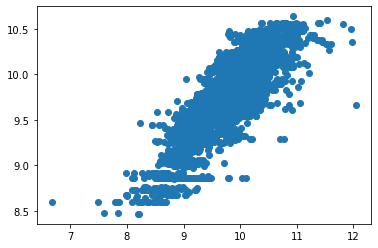

In [57]:
plt.scatter(np.log(y_test),model.predict(test))

In [ ]:
train_sel = pd.DataFrame(train,columns=columns)

test_sel = pd.DataFrame(test,columns=columns)

train_sel

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso

sel_model = SelectFromModel(Lasso(alpha=0.01,random_state=0))
sel_model.fit(train_sel,np.log(y_train))
features_selected = train_sel.columns[(sel_model.get_support())]
features_selected.to_list()

In [ ]:
print(np.sqrt(mean_squared_error(np.log(y_test),model.predict(test_sel))))

In [ ]:
print(np.sqrt(mean_squared_error(np.log(y_train),model.predict(train_sel))))

In [ ]:
#train_sel = scaler.fit_transform(train_sel[features_selected.to_list()])
model = LinearRegression()
model.fit(train_sel,np.log(y_train))


In [ ]:
from sklearn.svm import SVR
model = SVR(kernel='rbf')
model.fit(train,np.log(y_train))

In [ ]:
model = SVR(kernel = 'rbf',C=0.01)
model.fit(train_sel,np.log(y_train))
print(np.sqrt(mean_squared_error(np.log(y_test),model.predict(test_sel))))
print(np.sqrt(mean_squared_error(np.log(y_train),model.predict(train_sel))))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet, Ridge
model = SVR()
param_grid = {'C':[0.01,0.1,1,10,100],'kernel':['rbf','poly','linear'],'degree':[2,3],'gamma':['scale','auto']}
grid = GridSearchCV(estimator=model,param_grid=param_grid,cv=4,scoring='neg_root_mean_squared_error',verbose=2)


In [ ]:
grid.fit(train_sel,np.log(y_train))

In [ ]:
grid.best_estimator_

In [ ]:
from sklearn.tree import DecisionTree, RandomForest


In [ ]:
#test_sel = scaler.fit_transform(test_sel[features_selected.to_list()])
grid.predict(test_sel)
print(np.sqrt(mean_squared_error(np.log(y_test),grid.predict(test_sel))))
print(np.sqrt(mean_squared_error(np.log(y_train),grid.predict(train_sel))))

### Tree Models

In [31]:
def rmsle(predictions, dmat):
    labels = dmat.get_label()
    diffs = np.log(predictions + 1) - np.log(labels + 1)
    squared_diffs = np.square(diffs)
    avg = np.mean(squared_diffs)
    return ('RMSLE', np.sqrt(avg))

In [39]:
import catboost
from catboost import CatBoostRegressor
import time

ts = time.time()

model = CatBoostRegressor(
    depth=12,
    iterations=350,
    eta=0.1,
    subsample=0.9,
    loss_function='RMSE',
    colsample_bylevel=0.2,
    random_seed=42,

)

model.fit(
    train, 
    np.log(y_train), 
    eval_set=[(train, np.log(y_train)), (test,np.log(y_test))], 
    verbose=True, 
    early_stopping_rounds = 50)

time.time() - ts

0:	learn: 0.5194242	test: 0.5194242	test1: 0.5248952	best: 0.5248952 (0)	total: 10ms	remaining: 3.51s
1:	learn: 0.4961107	test: 0.4961107	test1: 0.5021263	best: 0.5021263 (1)	total: 17.4ms	remaining: 3.03s
2:	learn: 0.4725495	test: 0.4725495	test1: 0.4830681	best: 0.4830681 (2)	total: 45.5ms	remaining: 5.26s
3:	learn: 0.4617907	test: 0.4617907	test1: 0.4750817	best: 0.4750817 (3)	total: 50.4ms	remaining: 4.36s
4:	learn: 0.4426344	test: 0.4426344	test1: 0.4608285	best: 0.4608285 (4)	total: 62.2ms	remaining: 4.29s
5:	learn: 0.4270999	test: 0.4270999	test1: 0.4478929	best: 0.4478929 (5)	total: 67.1ms	remaining: 3.85s
6:	learn: 0.4154119	test: 0.4154119	test1: 0.4362114	best: 0.4362114 (6)	total: 69.7ms	remaining: 3.41s
7:	learn: 0.3945544	test: 0.3945544	test1: 0.4154326	best: 0.4154326 (7)	total: 90.6ms	remaining: 3.87s
8:	learn: 0.3850343	test: 0.3850343	test1: 0.4056683	best: 0.4056683 (8)	total: 101ms	remaining: 3.82s
9:	learn: 0.3674242	test: 0.3674242	test1: 0.3914052	best: 0.391405

2.9519498348236084

In [55]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error
print(np.sqrt(mean_squared_error(np.log(y_test),model.predict(test))))

0.3002273071360867


In [54]:
from sklearn.metrics import mean_squared_log_error
predictions=model.predict(test)
print("Mean Squared error is", np.sqrt(mean_squared_log_error(y_test, predictions)))

Mean Squared error is 7.426282274519265


In [53]:
print(np.sqrt(mean_squared_log_error(y_test,model.predict(test))))

7.474652047333245


<ipython-input-53-4565c0fe5b37>:1: RuntimeWarning: divide by zero encountered in log
  print(np.sqrt(mean_squared_log_error(y_test,model.predict(np.log(test)))))
<ipython-input-53-4565c0fe5b37>:1: RuntimeWarning: invalid value encountered in log
  print(np.sqrt(mean_squared_log_error(y_test,model.predict(np.log(test)))))


In [49]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

ts = time.time()

model = LGBMRegressor(
    max_depth=10,
    n_estimator=400,
    learning_rate=0.2
)

model.fit(
    train, 
    np.log(y_train), 
    eval_metric='rmse',
    eval_set=[(train, np.log(y_train)), (test, np.log(y_test))], 
    verbose=True, 
    early_stopping_rounds = 50)

time.time() - ts

[1]	valid_0's rmse: 0.468134	valid_0's l2: 0.219149	valid_1's rmse: 0.473439	valid_1's l2: 0.224145
Training until validation scores don't improve for 50 rounds
[2]	valid_0's rmse: 0.416049	valid_0's l2: 0.173097	valid_1's rmse: 0.424314	valid_1's l2: 0.180042
[3]	valid_0's rmse: 0.376788	valid_0's l2: 0.141969	valid_1's rmse: 0.396544	valid_1's l2: 0.157247
[4]	valid_0's rmse: 0.346294	valid_0's l2: 0.11992	valid_1's rmse: 0.367368	valid_1's l2: 0.134959
[5]	valid_0's rmse: 0.324088	valid_0's l2: 0.105033	valid_1's rmse: 0.346569	valid_1's l2: 0.12011
[6]	valid_0's rmse: 0.306201	valid_0's l2: 0.0937588	valid_1's rmse: 0.331913	valid_1's l2: 0.110166
[7]	valid_0's rmse: 0.293355	valid_0's l2: 0.0860569	valid_1's rmse: 0.323366	valid_1's l2: 0.104566
[8]	valid_0's rmse: 0.283364	valid_0's l2: 0.0802951	valid_1's rmse: 0.311935	valid_1's l2: 0.0973032
[9]	valid_0's rmse: 0.275708	valid_0's l2: 0.0760148	valid_1's rmse: 0.304525	valid_1's l2: 0.0927355
[10]	valid_0's rmse: 0.26928	valid_

0.15400147438049316

In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error
print(np.sqrt(mean_squared_error(np.log(y_test),model.predict(test))))

In [46]:
print(np.sqrt(mean_squared_log_error(y_test,model.predict(test))))

7.426371111200021


C:\Users\priya\anaconda3\lib\site-packages\xgboost\data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [43]:
from xgboost import XGBRegressor

ts = time.time()

model = XGBRegressor(
    max_depth=10,
    n_estimator=500,
    eta=0.3,
    subsample=0.9,
    alpha=0.8,
    min_child_weight=1,
    reg_lambda=1.8
)

model.fit(
    train, 
    np.log(y_train), 
    eval_metric=rmsle, 
    eval_set=[(train, np.log(y_train)), (test, np.log(y_test))], 
    verbose=True, 
    early_stopping_rounds = 50)

time.time() - ts

[23:22:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_estimator" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-rmse:6.49715	validation_0-RMSLE:0.92239	validation_1-rmse:6.52481	validation_1-RMSLE:0.92417
[1]	validation_0-rmse:4.55683	validation_0-RMSLE:0.54821	validation_1-rmse:4.60239	validation_1-RMSLE:0.55306
[2]	validation_0-rmse:3.20123	validation_0-RMSLE:0.35100	validation_1-rmse:3.24437	validation_1-RMSLE:0.35518
[3]	validation_0-rmse:2.25254	validation_0-RMSLE:0.23309	validation_1-rmse:2.30872	validation_1-RMSLE:0.23863
[4]	validation_0-rmse:1.59289	validation_0-RMSLE:0.15859	validation_1-rmse:1.65103	validation_1-RMSLE:0.16415
[5]	validation_0-rmse:1.13407	validation_0-RMSLE:0.10993	va

1.4460232257843018

In [ ]:
from sklearn.metrics import mean_squared_log_error, mean_squared_error
print(np.sqrt(mean_squared_error(np.log(y_test),model.predict(test))))

In [ ]:
merged=merged.replace({'Alibagh':'Alibag'},regex=True)
merged=merged.replace({'Chikmangalur':'Chikmagalur'},regex=True)
merged=merged.replace({'Tiruchirapally': 'Tiruchirappalli'},regex=True)

In [ ]:
# Distance from destination

temp['Start_city']=merged['Start City'].copy()
temp['Destination']=merged['Destination'].str.split('|',expand=True)[0].copy()
temp['Distance']=0

Delhi_cord=(28.6138954, 77.2090057)
Mumbai_cord=(19.0759899, 72.8773928)


from geopy.geocoders import Nominatim
import geopy.distance

geolocator = Nominatim(user_agent = "geoapiExercises")

coordinates_cities={}
for values in temp['Destination'].unique():
  location = geolocator.geocode(values,timeout=10000)
  cords=(location.latitude, location.longitude)
  coordinates_cities[values]=cords

delhi_distance={}
mumbai_distance={}

for key,values in coordinates_cities.items():
  d_distance=geopy.distance.vincenty(Delhi_cord, values).km
  m_distance=geopy.distance.vincenty(Mumbai_cord, values).km
  delhi_distance[key]=d_distance
  mumbai_distance[key]=m_distance


for index,row in temp.iterrows():
  if(row['Start_city']=='New Delhi'):
    destination_city=row['Destination']
    total_distance=delhi_distance[destination_city]
    temp.at[index,'Distance']=total_distance

  else:
    destination_city=row['Destination']
    total_distance=mumbai_distance[destination_city]
    temp.at[index,'Distance']=total_distance

merged['Distance_km']=temp['Distance'].copy()

In [ ]:
public_holidays=['2021-01-01',
'2021-01-26',
'2021-04-02',
'2021-05-14',
'2021-08-15',
'2021-10-02',
'2021-10-15',
'2021-11-04',
'2021-12-25',
'2021-12-31',
'2022-01-01',
'2022-01-26',
'2022-04-15',
'2022-05-02',
'2022-08-15',
'2022-10-05',
'2022-10-02',
'2022-10-24',
'2022-12-25',
'2022-12-31'
]
weekends + public holidays = 1
merged.loc[merged['Travel Date'].isin(public_holidays),'holiday']=1

In [ ]:
Is_Airline or not

In [ ]:
for col in train.columns:
    if ((train[col].isin(['Not Available']).value_counts()[0])!=len(train)):
        count = train[train[col] == 'Not Available' ][col].count()
    else:
        count = train[col].isnull().sum()
    if count>0:
        print(f'{col:30}: {count}')
        
# cancellation rules and sightseeing places covered groupby package and impute mode

In [ ]:
# Finding rare categorical labels in Package Name

def find_frequent_labels(df,var,rare_perc):
    temp = df.groupby(var)['Per Person Price'].count()/len(df)
    return temp[temp>rare_perc].index

var = ['Package Name']
#for var in cat_var:
frequent_ls = find_frequent_labels(train,var,0.000048)
train[var] = np.where(train[var].isin(frequent_ls),train[var],'rare')
test[var] = np.where(test[var].isin(frequent_ls),test[var],'rare')
    

In [ ]:
df['Destination'].equals(df['Places Covered'])

# Drop Uniq Id, Destination columns
# Use Itinerary for total trip duration, Places covered for places columns and total places covered, 
# Travel Date for month value extraction, Hotel Details for avg ratings and number of hotels, 
# Airline for creating Airline_new column, Sightseeing Places covered for total number of sites covered and drop them later

In [ ]:
# Filling missing values in cancellation rules with most frequent cancellation rule as per Package purchased

def mode_impute(df,dep_var,mis_var):

    temp = pd.DataFrame(train.groupby(dep_var)[mis_var].agg(pd.Series.mode))

    mis_var_ind = df.columns.get_loc(mis_var)
    for i in range(len(df)):
        if pd.isnull(df.iloc[i,mis_var_ind]):
            dep_var_ind = df.columns.get_loc(dep_var)
            package = df.iloc[i,dep_var_ind]
            if package in temp.index.to_list():
                if temp.loc[package,mis_var]!=np.nan:
                    df.iloc[i,mis_var_ind] = temp.loc[package,mis_var]
                else:
                    df.iloc[i,mis_var_ind] = temp.median()[0]
            else:
                temp_df = pd.DataFrame(df.groupby(dep_var)[mis_var].agg(pd.Series.mode))
                if temp_df.loc[package,mis_var]!=np.nan:
                    df.iloc[i,mis_var_ind] = temp_df.loc[package,mis_var]
                else:
                    df.iloc[i,mis_var_ind] = temp_df.median()[0]

In [ ]:
df['Airline_new'].value_counts()[0:25].plot.bar()
# binning

In [ ]:
df['Airline_new'].value_counts()[0:40]

In [ ]:
df.groupby('Airline_new')['Per Person Price'].median().sort_values()[:20]

In [ ]:
sns.scatterplot(data=df[df['Hotels Avg Rating'].notnull()],y='Per Person Price', x='Hotels Avg Rating');
# replace nan values to maintain the distribution (replace by arbitrary values as per price and distribution)

In [ ]:


df['Total Sightseeing Places Covered'] = df['Sightseeing Places Covered'].apply(get_num_places)
df['Sightseeing Places Covered'][11].split('|')

# use package Name and Package type to fill hotel missing values and sightseeing places missing values
# Use package Name for cancellation rules

df['Hotel Details'][11]
# create a column for average hotel ratings and number of hotels 

df['Itinerary'][11]
# create column for number of nights and number of destinations

df['Places Covered'][11]
# if possible create a new category namely north, south, east, west, central, northeast India and abroad

df['Sightseeing Places Covered'][11]
# create a column for number of sightseeing places

df['Package Name'].value_counts().sort_values(ascending=False)[:20]
# replace package name by their count

df['Airline'].value_counts().sort_values(ascending=False)[:50]
# Keep unique values in each record

df['Travel Date'][11]
# Extract information regarding weekday/weekend, month, year

df['Package Type'].value_counts()
# ordinal encoding

df['Destination'].apply(lambda x: x.split('|'))
df1 = pd.DataFrame(df['Destination'].apply(lambda x: x.split('|')), index=df.index)
df1.head()
df2 = df1['Destination'].map(lambda x: ','.join(map(str, x))).str.get_dummies(sep=',')